# Quick tests with numba jit, vectorize and guvectorize

In [1]:
import numpy as np
from numba import njit, vectorize, guvectorize, prange
from tqdm.notebook import tqdm as tq # produce the progress bar
import matplotlib.pyplot as plt

### scalar-vector multiplication

In [2]:
@njit
def scalar_vector_jit(x, y, res):
    for i in range(y.size):
        res[i] = x*y[i]
    return res

In [3]:
@njit(parallel=True)
def scalar_vector_jit_par(x, y, res):
    for i in prange(y.size):
        res[i] = x*y[i]
    return res

In [4]:
@guvectorize('float64, float64[:], float64[:]', '(),(n)->(n)')
def scalar_vector_guv(x, y, res):
    for i in range(y.size):
        res[i] = x*y[i]

In [5]:
@guvectorize('float64, float64[:], float64[:]', '(),(n)->(n)',
             target='parallel')
def scalar_vector_guv_par(x, y, res):
    for i in range(y.size):
        res[i] = x*y[i]

In [6]:
N = np.array([1000, 3000, 5000, 10000, 15000, 30000, 50000, 100000])

In [7]:
list_time_numpy = []
list_time_jit = []
list_time_jit_par = []
list_time_guv = []
list_time_guv_par = []
for Ni in tq(N):
    vector = np.ones(Ni)
    result = np.empty_like(vector)
    # numpy
    time = %timeit -o 3.*vector
    list_time_numpy.append(time.average)
    # scalar_vector_jit
    time = %timeit -o scalar_vector_jit(3., vector, result)
    list_time_jit.append(time.average)
    # scalar_vector_jit_par
    time = %timeit -o scalar_vector_jit_par(3., vector, result)
    list_time_jit_par.append(time.average)
    # scalar_vector_guv
    time = %timeit -o scalar_vector_guv(3., vector, result)
    list_time_guv.append(time.average)
    # scalar_vector_guv_par
    time = %timeit -o scalar_vector_guv_par(3., vector, result)
    list_time_guv_par.append(time.average)

2.3 µs ± 27.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
752 ns ± 6.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
43.7 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.02 µs ± 70.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.6 µs ± 89.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.01 µs ± 4.59 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.72 µs ± 7.07 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
123 µs ± 673 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.16 µs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.8 µs ± 40.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.74 µs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.23 µs ± 21 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
122 µs ± 448 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.23 µs ± 12.3 ns per loop (mean ± std. d

In [8]:
list_time_numpy = np.array(list_time_numpy)
list_time_jit = np.array(list_time_jit)
list_time_jit_par = np.array(list_time_jit_par)
list_time_guv = np.array(list_time_guv)
list_time_guv_par = np.array(list_time_guv_par)

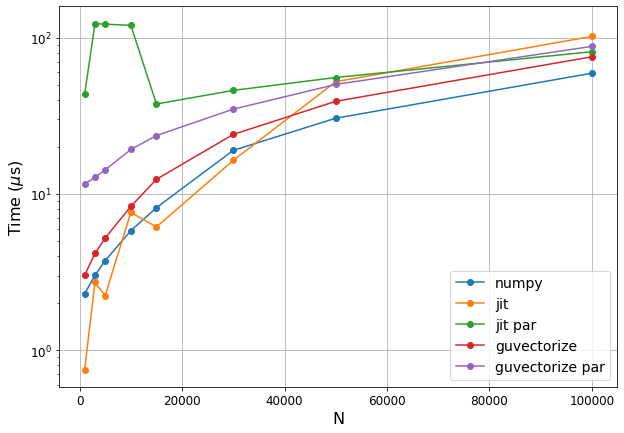

In [9]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_numpy*1e6, 'o-', label = 'numpy')
plt.plot(N, list_time_jit*1e6, 'o-', label = 'jit')
plt.plot(N, list_time_jit_par*1e6, 'o-', label = 'jit par')
plt.plot(N, list_time_guv*1e6, 'o-', label = 'guvectorize')
plt.plot(N, list_time_guv_par*1e6, 'o-', label = 'guvectorize par')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()

### Outer product

In [10]:
@njit
def outer_jit(x, y, res):
    for i in range(x.size):
        for j in range(y.size):
            res[i,j] = x[i]*y[j]
    return res

In [11]:
@njit(parallel=True)
def outer_jit_par(x, y, res):
    for i in prange(x.size):
        for j in range(y.size):
            res[i,j] = x[i]*y[j]
    return res

In [12]:
@guvectorize('float64[:], float64[:], float64[:,:]', '(m),(n)->(m,n)')
def outer_guv(x, y, res):
    for i in range(x.size):
        for j in range(y.size):
            res[i,j] = x[i]*y[j]

In [13]:
@guvectorize('float64[:], float64[:], float64[:,:]', '(m),(n)->(m,n)',
             target='parallel')
def outer_guv_par(x, y, res):
    for i in range(x.size):
        for j in range(y.size):
            res[i,j] = x[i]*y[j]

In [14]:
N = np.array([10, 30, 50, 100, 200, 500])

In [15]:
list_time_numpy = []
list_time_jit = []
list_time_jit_par = []
list_time_guv = []
list_time_guv_par = []
for Ni in tq(N):
    vector = np.ones(Ni)
    result = np.empty((vector.size, vector.size))
    # numpy
    time = %timeit -o np.outer(vector, vector)
    list_time_numpy.append(time.average)
    # outer_jit
    time = %timeit -o outer_jit(vector, vector, result)
    list_time_jit.append(time.average)
    # outer_jit_par
    time = %timeit -o outer_jit_par(vector, vector, result)
    list_time_jit_par.append(time.average)
    # outer_guv
    time = %timeit -o outer_guv(vector, vector, result)
    list_time_guv.append(time.average)
    # outer_guv_par
    time = %timeit -o outer_guv_par(vector, vector, result)
    list_time_guv_par.append(time.average)

6.49 µs ± 26.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
618 ns ± 8.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
39.1 µs ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.6 µs ± 4.23 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
8.98 µs ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.44 µs ± 560 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.06 µs ± 0.852 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
125 µs ± 552 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.32 µs ± 15.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.93 µs ± 290 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.1 µs ± 11.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.29 µs ± 3.56 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
124 µs ± 977 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.31 µs ± 19.8 ns per loop (mean ± st

In [16]:
list_time_numpy = np.array(list_time_numpy)
list_time_jit = np.array(list_time_jit)
list_time_jit_par = np.array(list_time_jit_par)
list_time_guv = np.array(list_time_guv)
list_time_guv_par = np.array(list_time_guv_par)

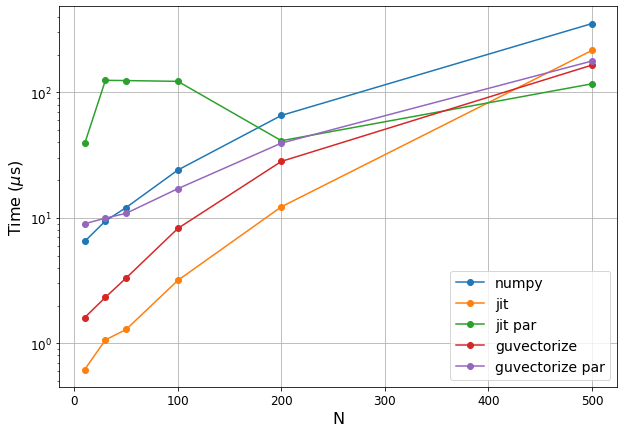

In [17]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_numpy*1e6, 'o-', label = 'numpy')
plt.plot(N, list_time_jit*1e6, 'o-', label = 'jit')
plt.plot(N, list_time_jit_par*1e6, 'o-', label = 'jit par')
plt.plot(N, list_time_guv*1e6, 'o-', label = 'guvectorize')
plt.plot(N, list_time_guv_par*1e6, 'o-', label = 'guvectorize par')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()

### Hadamard product - for real vectors

In [18]:
@njit
def hadamard_jit(x, y):
    res = np.empty_like(x)
    for i in range(x.shape[0]):
        res[i] = x[i]*y[i]
    return res

In [19]:
@njit(parallel=True)
def hadamard_jit_par(x, y):
    res = np.empty_like(x)
    for i in prange(x.shape[0]):
        res[i] = x[i]*y[i]
    return res

In [20]:
@vectorize(['int32(int32, int32)',
            'int64(int64, int64)',
            'float32(float32, float32)',
            'float64(float64, float64)'])
def hadamard_vec(x, y):
    res = x*y
    return res

In [21]:
@vectorize(['int32(int32, int32)',
            'int64(int64, int64)',
            'float32(float32, float32)',
            'float64(float64, float64)'], target='parallel')
def hadamard_vec_par(x, y):
    res = x*y
    return res

In [22]:
N = np.array([1000, 3000, 5000, 10000, 15000, 30000, 50000, 100000])

In [23]:
list_time_numpy = []
list_time_jit = []
list_time_jit_par = []
list_time_vec = []
list_time_vec_par = []
for Ni in tq(N):
    vector = np.ones(Ni)
    # numpy
    time = %timeit -o vector*vector
    list_time_numpy.append(time.average)
    # hadamard_jit
    time = %timeit -o hadamard_jit(vector, vector)
    list_time_jit.append(time.average)
    # hadamard_jit_par
    time = %timeit -o hadamard_jit_par(vector, vector)
    list_time_jit_par.append(time.average)
    # hadamard_vec
    time = %timeit -o hadamard_vec(vector, vector)
    list_time_vec.append(time.average)
    # hadamard_vec_par
    time = %timeit -o hadamard_vec_par(vector, vector)
    list_time_vec_par.append(time.average)

1.44 µs ± 10.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.3 µs ± 13.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
43 µs ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.55 µs ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
49.4 µs ± 709 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.26 µs ± 80.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.38 µs ± 26.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
121 µs ± 551 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.45 µs ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
50.2 µs ± 64.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.87 µs ± 25.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3 µs ± 7.36 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
119 µs ± 544 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.18 µs ± 4.91 ns per loop (mean ± std. dev

In [24]:
list_time_numpy = np.array(list_time_numpy)
list_time_jit = np.array(list_time_jit)
list_time_jit_par = np.array(list_time_jit_par)
list_time_vec = np.array(list_time_vec)
list_time_vec_par = np.array(list_time_vec_par)

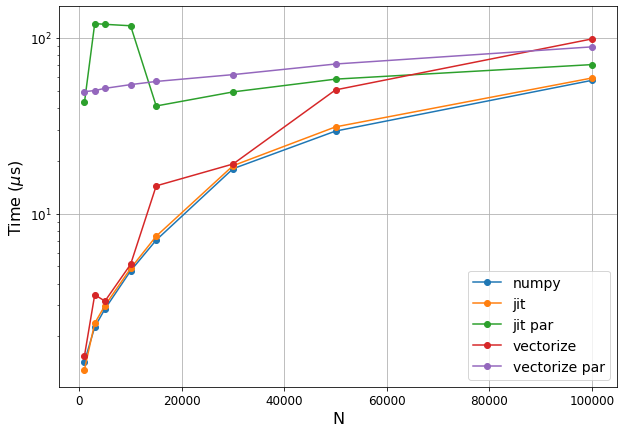

In [25]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_numpy*1e6, 'o-', label = 'numpy')
plt.plot(N, list_time_jit*1e6, 'o-', label = 'jit')
plt.plot(N, list_time_jit_par*1e6, 'o-', label = 'jit par')
plt.plot(N, list_time_vec*1e6, 'o-', label = 'vectorize')
plt.plot(N, list_time_vec_par*1e6, 'o-', label = 'vectorize par')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()

### Hadamard product - for real matrices

In [26]:
@njit
def hadamard_mat_jit(x, y, res):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            res[i,j] = x[i,j]*y[i,j]
    return res

In [27]:
@njit(parallel=True)
def hadamard_mat_jit_par(x, y, res):
    for i in prange(x.shape[0]):
        for j in range(x.shape[1]):
            res[i,j] = x[i,j]*y[i,j]
    return res

In [28]:
@guvectorize('float64[:,:], float64[:,:], float64[:,:]',
             '(m,n),(m,n)->(m,n)')
def hadamard_mat_guv(x, y, res):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            res[i,j] = x[i,j]*y[i,j]

In [29]:
@guvectorize('float64[:,:], float64[:,:], float64[:,:]',
             '(m,n),(m,n)->(m,n)', target='parallel')
def hadamard_mat_guv_par(x, y, res):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            res[i,j] = x[i,j]*y[i,j]

In [32]:
N = np.array([100, 500, 700, 800, 1000, 2000])

In [33]:
list_time_numpy = []
list_time_jit = []
list_time_jit_par = []
list_time_guv = []
list_time_guv_par = []
for Ni in tq(N):
    matrix = np.ones((Ni,Ni))
    result = np.empty((Ni,Ni))
    # numpy
    time = %timeit -o matrix*matrix
    list_time_numpy.append(time.average)
    # hadamard_mat_jit
    time = %timeit -o hadamard_mat_jit(matrix, matrix, result)
    list_time_jit.append(time.average)
    # hadamard_mat_jit_par
    time = %timeit -o hadamard_mat_jit_par(matrix, matrix, result)
    list_time_jit_par.append(time.average)
    # hadamard_mat_guv
    time = %timeit -o hadamard_mat_guv(matrix, matrix, result)
    list_time_guv.append(time.average)
    # hadamard_mat_guv_par
    time = %timeit -o hadamard_mat_guv_par(matrix, matrix, result)
    list_time_guv_par.append(time.average)

5.38 µs ± 204 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.01 µs ± 36.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
120 µs ± 562 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
9.89 µs ± 49.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20.3 µs ± 55.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
143 µs ± 271 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
250 µs ± 579 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
130 µs ± 86.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
188 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
199 µs ± 937 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
421 µs ± 761 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
547 µs ± 660 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
344 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
482 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 100

In [34]:
list_time_numpy = np.array(list_time_numpy)
list_time_jit = np.array(list_time_jit)
list_time_jit_par = np.array(list_time_jit_par)
list_time_guv = np.array(list_time_guv)
list_time_guv_par = np.array(list_time_guv_par)

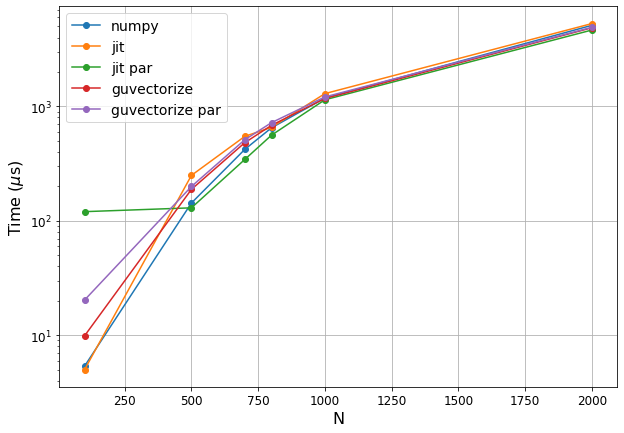

In [35]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_numpy*1e6, 'o-', label = 'numpy')
plt.plot(N, list_time_jit*1e6, 'o-', label = 'jit')
plt.plot(N, list_time_jit_par*1e6, 'o-', label = 'jit par')
plt.plot(N, list_time_guv*1e6, 'o-', label = 'guvectorize')
plt.plot(N, list_time_guv_par*1e6, 'o-', label = 'guvectorize par')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()